In [1]:
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [2]:
crime_dataset = pd.read_csv("./Chicago_Crimes_2012_to_2017.csv")

In [3]:
crime_dataset.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
crime_dataset.shape

(1456714, 23)

In [5]:
crime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

In [6]:
# Preprocessing
# Remove NaN Value (As Dataset is huge, the NaN row could be neglectable)  
crime_dataset = crime_dataset.dropna()

In [7]:
# As the dataset is too huge is size, we would just subsampled a dataset for modelling as proof of concept
crime_dataset = crime_dataset.sample(n=100000)

In [8]:
# Remove irrelevant/not meaningfull attributes
crime_dataset = crime_dataset.drop(['Unnamed: 0'], axis=1)
crime_dataset = crime_dataset.drop(['ID'], axis=1)
crime_dataset = crime_dataset.drop(['Case Number'], axis=1) 

crime_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 752075 to 132291
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  100000 non-null  object 
 1   Block                 100000 non-null  object 
 2   IUCR                  100000 non-null  object 
 3   Primary Type          100000 non-null  object 
 4   Description           100000 non-null  object 
 5   Location Description  100000 non-null  object 
 6   Arrest                100000 non-null  bool   
 7   Domestic              100000 non-null  bool   
 8   Beat                  100000 non-null  int64  
 9   District              100000 non-null  float64
 10  Ward                  100000 non-null  float64
 11  Community Area        100000 non-null  float64
 12  FBI Code              100000 non-null  object 
 13  X Coordinate          100000 non-null  float64
 14  Y Coordinate          100000 non-null  float64


In [9]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
crime_dataset['date2'] = pd.to_datetime(crime_dataset['Date'])
crime_dataset['Year'] = crime_dataset['date2'].dt.year
crime_dataset['Month'] = crime_dataset['date2'].dt.month
crime_dataset['Day'] = crime_dataset['date2'].dt.day
crime_dataset['Hour'] = crime_dataset['date2'].dt.hour
crime_dataset['Minute'] = crime_dataset['date2'].dt.minute
crime_dataset['Second'] = crime_dataset['date2'].dt.second 
crime_dataset = crime_dataset.drop(['Date'], axis=1) 
crime_dataset = crime_dataset.drop(['date2'], axis=1) 
crime_dataset = crime_dataset.drop(['Updated On'], axis=1)
crime_dataset.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
752075,001XX N CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,False,True,1222,12.0,2.0,...,1900630.0,2014,41.883085,-87.696340,"(41.883085308, -87.696339551)",3,1,3,0,0
880888,012XX S KOLIN AVE,0460,BATTERY,SIMPLE,RESIDENTIAL YARD (FRONT/BACK),False,False,1011,10.0,24.0,...,1893986.0,2014,41.865054,-87.733704,"(41.865053675, -87.733704491)",8,15,10,59,0
100945,009XX S CLAREMONT AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,False,1224,12.0,25.0,...,1895841.0,2012,41.869879,-87.684902,"(41.869879091, -87.684901761)",1,23,8,0,0
252593,041XX W CULLERTON ST,0810,THEFT,OVER $500,STREET,False,False,1012,10.0,24.0,...,1890101.0,2012,41.854363,-87.728104,"(41.854362853, -87.728103883)",7,13,4,0,0
215947,089XX S MACKINAW AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,SIDEWALK,False,True,424,4.0,10.0,...,1846227.0,2012,41.732836,-87.542962,"(41.732835539, -87.542962269)",6,8,0,20,0


In [10]:
# Convert Categorical Attributes to Numerical
crime_dataset['Block'] = pd.factorize(crime_dataset["Block"])[0]
crime_dataset['IUCR'] = pd.factorize(crime_dataset["IUCR"])[0]
crime_dataset['Description'] = pd.factorize(crime_dataset["Description"])[0]
crime_dataset['Location Description'] = pd.factorize(crime_dataset["Location Description"])[0]
crime_dataset['FBI Code'] = pd.factorize(crime_dataset["FBI Code"])[0]
crime_dataset['Location'] = pd.factorize(crime_dataset["Location"])[0] 

In [11]:
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


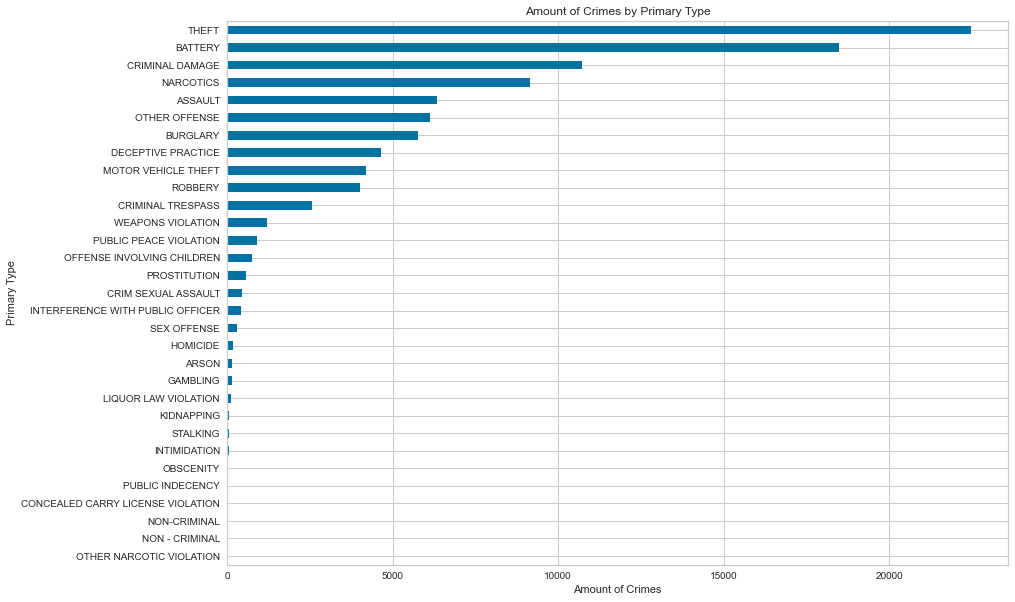

In [12]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')
crime_dataset.groupby([crime_dataset['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [13]:
# At previous plot, we could see that the classes is quite imbalance
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = crime_dataset.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
10,HOMICIDE,191
0,ARSON,163
9,GAMBLING,159
14,LIQUOR LAW VIOLATION,130
13,KIDNAPPING,71
28,STALKING,61
12,INTIMIDATION,47
19,OBSCENITY,13
24,PUBLIC INDECENCY,5
4,CONCEALED CARRY LICENSE VIOLATION,5


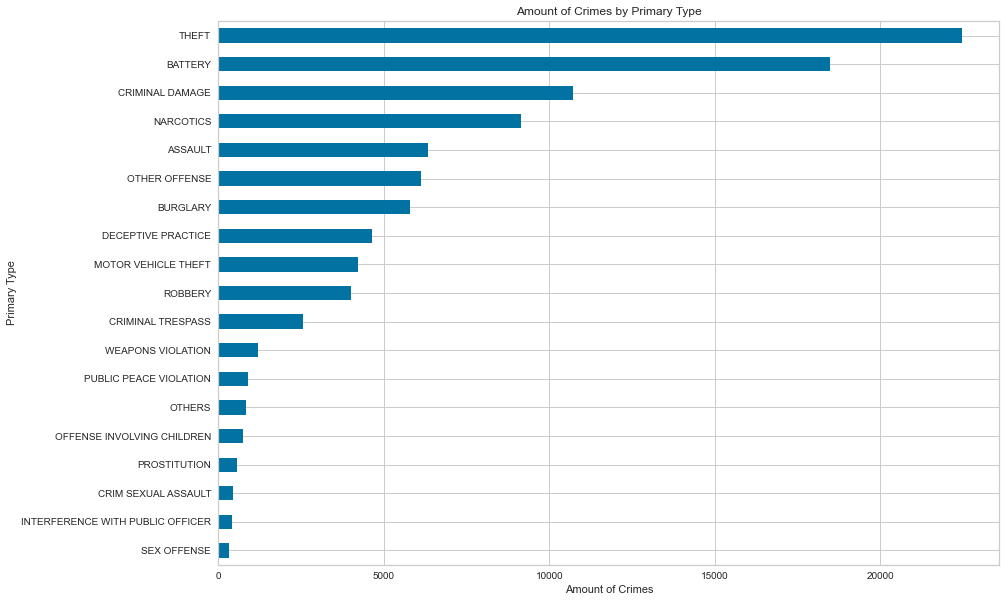

In [14]:
# After that, we replaced it with label 'OTHERS'
crime_dataset.loc[crime_dataset['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

crime_dataset.groupby([crime_dataset['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [15]:
# Now we are left with 14 Class as our predictive class
Classes = crime_dataset['Primary Type'].unique()
Classes

array(['BATTERY', 'OTHER OFFENSE', 'THEFT', 'NARCOTICS', 'ROBBERY',
       'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT', 'BURGLARY',
       'INTERFERENCE WITH PUBLIC OFFICER', 'ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'WEAPONS VIOLATION', 'CRIM SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'PROSTITUTION', 'OTHERS',
       'PUBLIC PEACE VIOLATION', 'SEX OFFENSE'], dtype=object)

In [16]:
#Encode target labels into categorical variables:
crime_dataset['Primary Type'] = pd.factorize(crime_dataset["Primary Type"])[0] 
crime_dataset['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64)

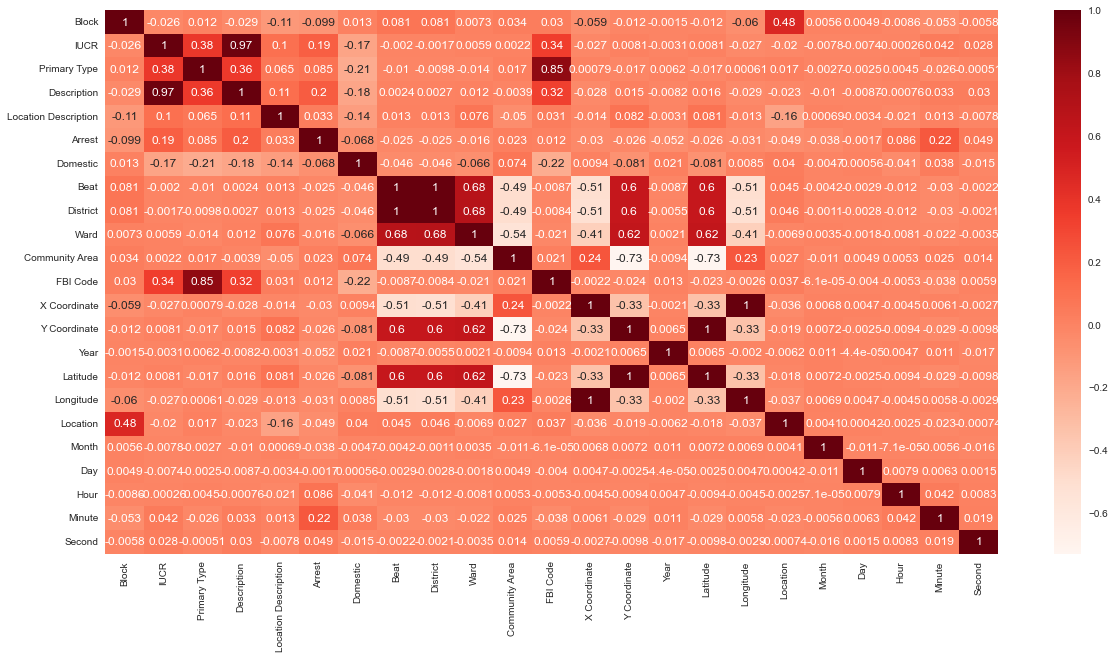

In [17]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = crime_dataset.drop(['Primary Type'], axis=1)
Y_fs = crime_dataset['Primary Type']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = crime_dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR            0.376451
Primary Type    1.000000
Description     0.363794
Domestic        0.214842
FBI Code        0.852313
Name: Primary Type, dtype: float64

In [19]:
# At Current Point, the attributes is select manually based on Feature Selection Part. 
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


In [20]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(crime_dataset, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code']
Target Class        :  Primary Type
Training Set Size   :  (80000, 23)
Test Set Size       :  (20000, 23)


In [21]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)
# Model Training
rf_model.fit(X=x1,
             y=x2)
# Prediction
result = rf_model.predict(y[Features])

In [22]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.9959
Recall      :  0.9959
Precision   :  0.9958877719724616
F1 Score    :  0.9959
[[3634    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   1 1265    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    1    7]
 [   0    0 4510    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0 1813    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0  798    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0 2052    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0  864    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0 1178    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    2    0    0    0    0    0    3   76    2    0

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                                  precision    recall  f1-score   support

                         BATTERY       1.00      1.00      1.00      3634
                   OTHER OFFENSE       0.99      0.99      0.99      1274
                           THEFT       1.00      1.00      1.00      4510
                       NARCOTICS       1.00      1.00      1.00      1813
                         ROBBERY       1.00      1.00      1.00       798
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2052
             MOTOR VEHICLE THEFT       1.00      1.00      1.00       864
                        BURGLARY       1.00      1.00      1.00      1178
INTERFERENCE WITH PUBLIC OFFICER       1.00      0.92      0.96        83
                         ASSAULT       0.99      1.00      0.99      1297
               CRIMINAL TRESPASS       1.00      1.00      1.00       530
              DECEPTIVE PRACTICE       1.00      0.9

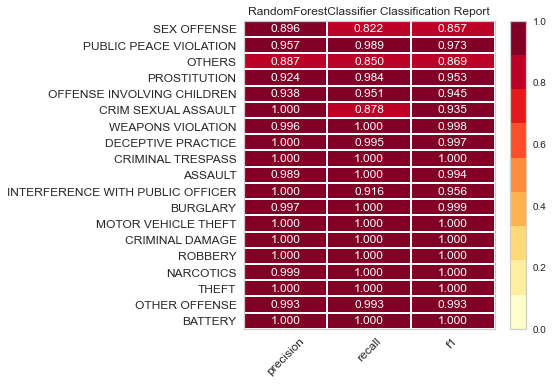

In [23]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()  

In [24]:
# Neural Network
# Create Model with configuration 
nn_model = MLPClassifier(solver='adam', 
                         alpha=1e-5,
                         hidden_layer_sizes=(40,), 
                         random_state=1,
                         max_iter=1000                         
                        )
# Model Training
nn_model.fit(X=x1,
             y=x2)
# Prediction
result = nn_model.predict(y[Features]) 

In [25]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Neural Network Results ==========
Accuracy    :  0.95665
Recall      :  0.95665
Precision   :  0.9578227136287593
F1 Score    :  0.9566500000000001
Confusion Matrix: 
[[3634    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0 1250    0    0    0    0    0    0    0    0   11    0    0    0
     0    0    7    6    0]
 [   0    0 4510    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0   43    0 1745    0    0    0    0    0    0   25    0    0    0
     0    0    0    0    0]
 [   0    0    0    0  798    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0 2052    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0  864    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0 1178    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0 

================= Classification Report =================

                                  precision    recall  f1-score   support

                         BATTERY       1.00      1.00      1.00      3634
                   OTHER OFFENSE       0.81      0.98      0.89      1274
                           THEFT       1.00      1.00      1.00      4510
                       NARCOTICS       1.00      0.96      0.98      1813
                         ROBBERY       1.00      1.00      1.00       798
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2052
             MOTOR VEHICLE THEFT       1.00      1.00      1.00       864
                        BURGLARY       1.00      1.00      1.00      1178
INTERFERENCE WITH PUBLIC OFFICER       1.00      0.90      0.95        83
                         ASSAULT       1.00      0.98      0.99      1297
               CRIMINAL TRESPASS       0.91      0.72      0.80       530
              DECEPTIVE PRACTICE       0.85      0.8

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


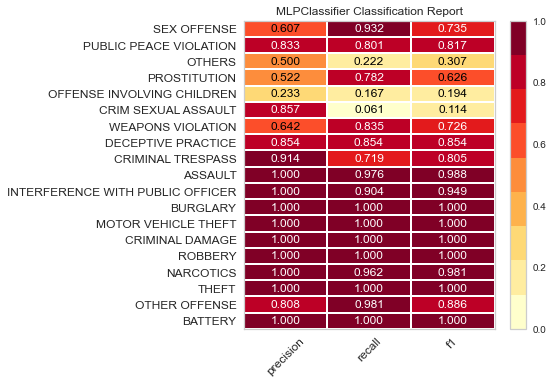

In [26]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(nn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof() 

In [27]:
# K-Nearest Neighbors
# Create Model with configuration 
knn_model = KNeighborsClassifier(n_neighbors=3)
# Model Training
knn_model.fit(X=x1,
             y=x2)
# Prediction
result = knn_model.predict(y[Features]) 

In [28]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== K-Nearest Neighbors Results ==========
Accuracy    :  0.99895
Recall      :  0.99895
Precision   :  0.998950169004343
F1 Score    :  0.99895
Confusion Matrix: 
[[3634    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   2 1271    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0 4510    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   2    2    0 1809    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   4    0    0    0  794    0    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0 2052    0    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0  864    0    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0    0    0 1178    0    0    0    0    0    0
     0    0    0    0    0]
 [   0    0    0    0    0   

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


================= Classification Report =================

                                  precision    recall  f1-score   support

                         BATTERY       1.00      1.00      1.00      3634
                   OTHER OFFENSE       1.00      1.00      1.00      1274
                           THEFT       1.00      1.00      1.00      4510
                       NARCOTICS       1.00      1.00      1.00      1813
                         ROBBERY       1.00      0.99      1.00       798
                 CRIMINAL DAMAGE       1.00      1.00      1.00      2052
             MOTOR VEHICLE THEFT       1.00      1.00      1.00       864
                        BURGLARY       1.00      1.00      1.00      1178
INTERFERENCE WITH PUBLIC OFFICER       1.00      1.00      1.00        83
                         ASSAULT       1.00      1.00      1.00      1297
               CRIMINAL TRESPASS       1.00      1.00      1.00       530
              DECEPTIVE PRACTICE       1.00      1.0

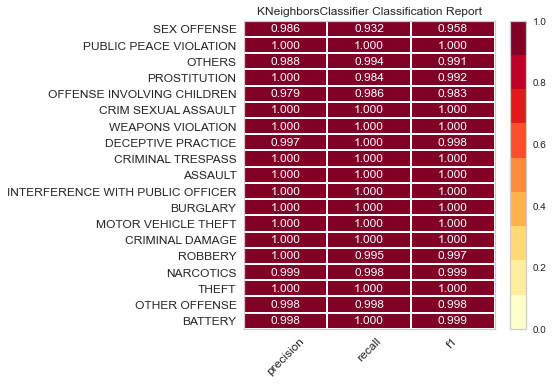

In [29]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(knn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()   

In [30]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x1,x2,train_size=0.5)

In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [32]:
model.fit(X_train,Y_train)

LogisticRegression()

In [33]:
model.predict(X_test)


array([5, 2, 0, ..., 0, 2, 2], dtype=int64)

In [34]:
Y_predict=model.predict(X_test)
print('Accuracy of logistic regression classifier on test set is:',((model.score(X_test,Y_test)*100)))

Accuracy of logistic regression classifier on test set is: 62.544999999999995


In [35]:
print("Accuracy  of Random Forest  : ", ac_sc)


Accuracy  of Random Forest  :  0.99895
